In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/macpro/Documents/Git-Repos/data-analysis-with-sql/kickstarter-projects/ksprojects_cleaned.csv')
df.head()

,category,main_category,goal,pledged,state,backers,pct_pledged
0,Sculpture,Art,9847.0,12527.0,successful,120,1.27
1,Shorts,Film & Video,10000.0,10056.0,successful,38,1.01
2,Tabletop Games,Games,2500.0,2578.0,successful,50,1.03
3,Country & Folk,Music,1000.0,3264.0,successful,78,3.26
4,Tabletop Games,Games,35.0,4479.0,successful,82,127.97


#### Investigate the distribution of projects categorized as success and failure 

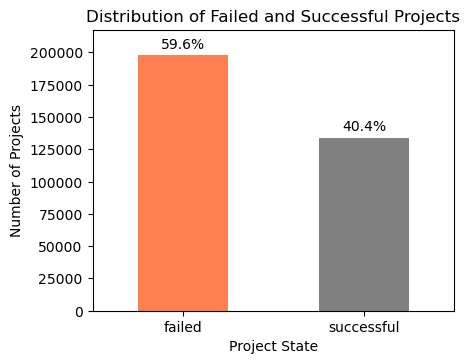

In [3]:
# Get the value counts and calculate percentages
state_counts = df['state'].value_counts()
total = state_counts.sum()
percentages = (state_counts / total) * 100

fig, ax = plt.subplots(figsize=(5, 4))
bars = state_counts.plot(kind='bar', color=['coral', 'grey'], ax=ax)

plt.title('Distribution of Failed and Successful Projects')
plt.xlabel('Project State')
plt.ylabel('Number of Projects')

# Increase y-axis limit by 10%
ax.set_ylim(0, state_counts.max() * 1.1)  

# Add percentages above the bars, keeping them inside the chart
for i, value in enumerate(state_counts):
    ax.text(i, value + total * 0.01, f'{percentages[i]:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=0)

# Adjust layout and adds padding to prevent overlap
plt.tight_layout(pad=2.0)
plt.show()


In [4]:
successful_categories = df.loc[df['state']=='successful', 'main_category']
print("Successful project categories:")
for category in successful_categories.unique():
    print(category)


Successful project categories:
Art
Film & Video
Games
Music
Publishing
Photography
Design
Food
Comics
Fashion
Dance
Theater
Technology
Journalism
Crafts


#### Investigate the distribution of successful projects of each category

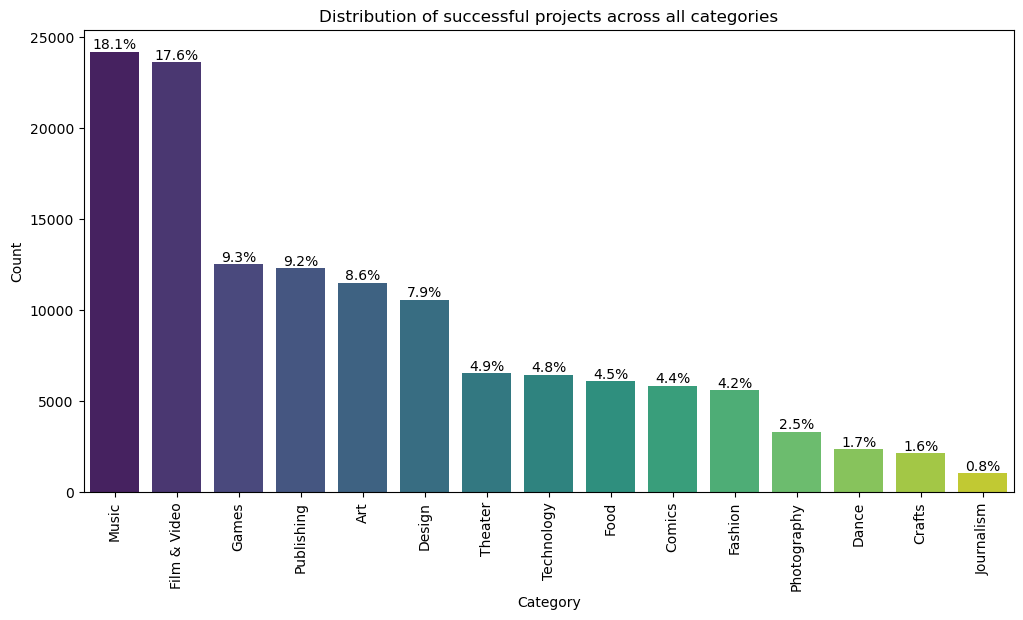

In [5]:
# Count the occurrences of each category
successful_category_count = successful_categories.value_counts()

# Total successful projects
total_successful_projects = successful_category_count.sum()

# Plot the distribution of all categories
plt.figure(figsize=(12,6))
ax = sns.barplot(x=successful_category_count.index, y=successful_category_count.values, palette='viridis')

# Add percentages on top of bars
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total_successful_projects:.1f}%"  # Calculate percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of successful projects across all categories')
plt.xticks(rotation=90)  # Rotate category names for better visibility
plt.show()


##### Let's investigate the success-to-failure ratio of each category and examine the number of backers in each category's respective state

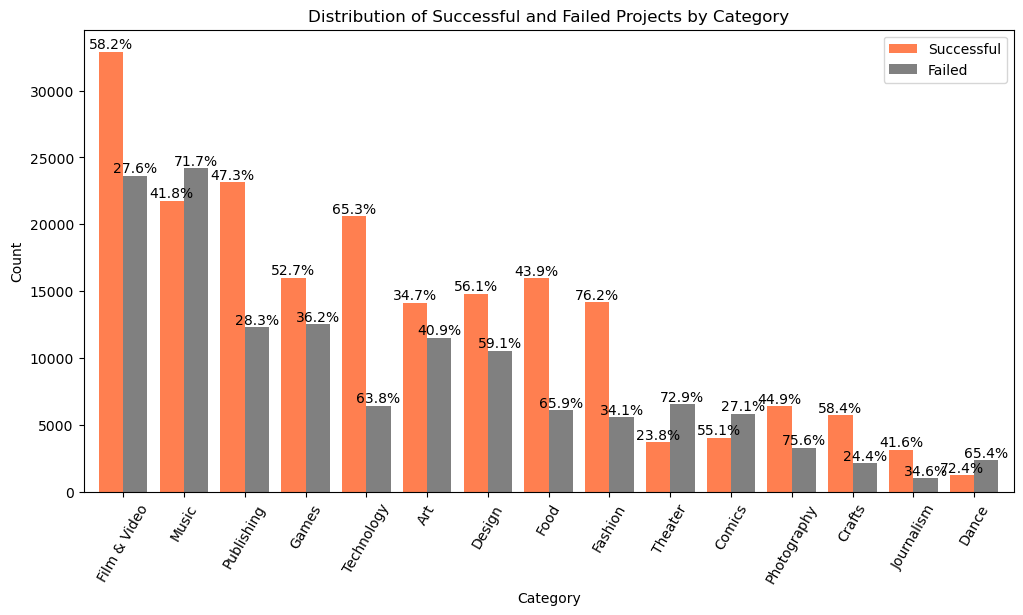

In [6]:

# Count occurrences of successful and failed projects per category, then sort by total
category_counts = df.groupby(['main_category', 'state']).size().unstack(fill_value=0)
category_counts = category_counts.loc[category_counts.sum(axis=1).sort_values(ascending=False).index]

# Compute percentages
category_percentages = category_counts.div(category_counts.sum(axis=1), axis=0) * 100

# Plot bar chart
ax = category_counts.plot(kind='bar', figsize=(12, 6), color=['coral', 'grey'], width=0.8)

# Add percentage labels
for bar, (cat, state) in zip(ax.patches, category_percentages.stack().items()):
    ax.annotate(f"{state:.1f}%", (bar.get_x() + bar.get_width()/2, bar.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Successful and Failed Projects by Category')
plt.xticks(rotation=60)
plt.legend(['Successful', 'Failed'])
plt.show()


In [7]:
# Calculate the mean number of backers
mean_backers_by_state = df.groupby(['main_category', 'state'])['backers'].mean().unstack(fill_value=0)
print(mean_backers_by_state)

state             failed  successful
main_category                       
Art             8.821386   90.358123
Comics         21.420961  231.404314
Crafts          6.005962   94.148463
Dance           9.567611   63.396065
Design         31.548603  614.783791
Fashion         9.864335  217.001252
Film & Video   15.114880  152.560428
Food           12.616945  180.557929
Games          43.961695  814.384087
Journalism      7.814154  152.306324
Music           9.193637  102.185354
Photography     9.312030  108.746445
Publishing     10.186477  158.823089
Technology     20.262418  717.678738
Theater        11.542611   70.505663
